# Natural Language Processing 개요

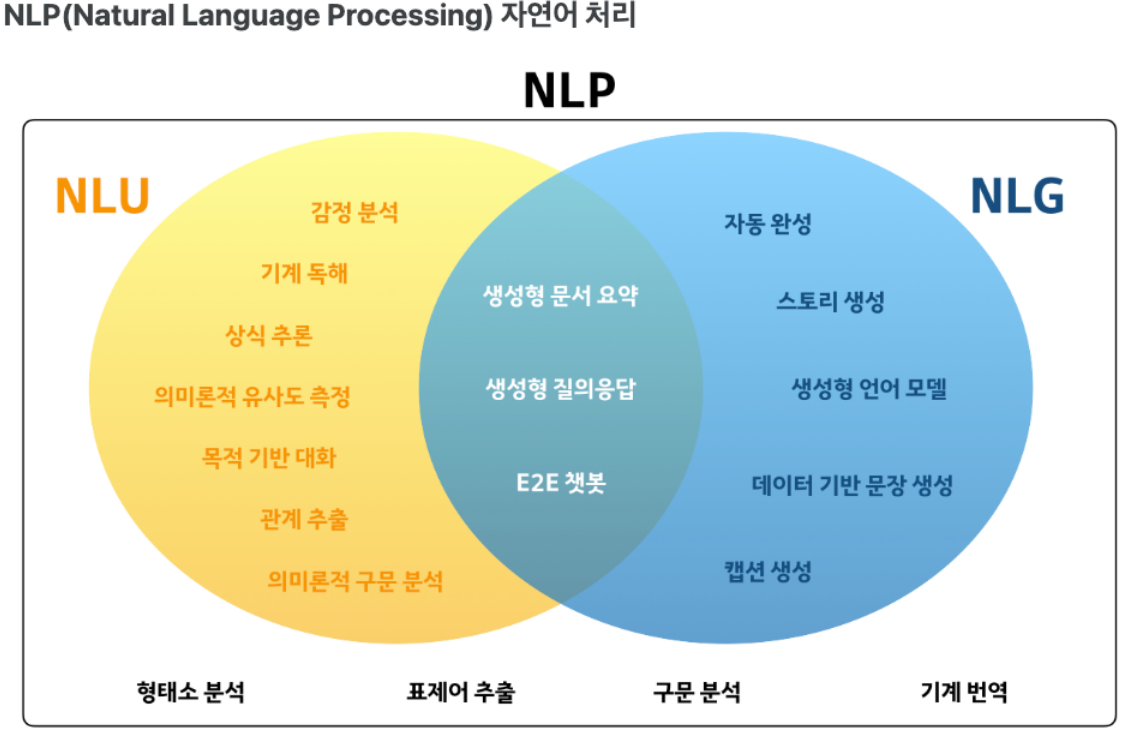

## 자연어 처리 과정

- NLU(Natural Language Understanding)
> 자연어 이해; 자연어 형태의 문장을 이해하는 기술    
> 예) 구글에서 NLU 기술을 접목해 기존 키워드 매칭 방식과 비교해 더 나은 검색 서비스를 제공함

- NLG(Natural Language Generation)
> 자연어 생성: 자연어 문장을 생성하는 기술     
> 예) 자동 완성, 스토리 생성

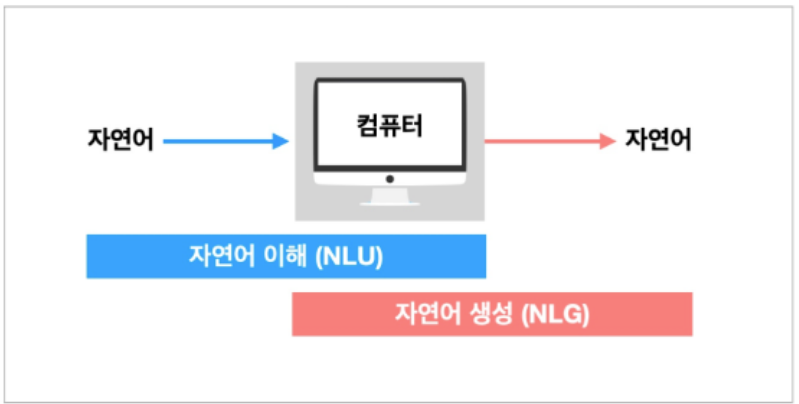

## 자연어 처리 응용

> 이메일 필터링(Email filtering), 언어 번역(Language translation), 스마트 비서(Smart assistants), 문서 분석(Document analysis), 온라인 검색(Online searches), 예측 텍스트(Predictive text), 자동 요약(Automatic summarization), 감정 분석(Sentiment analysis), 챗봇(Chatbots), 소셜 미디어 모니터링(Social media monitoring)

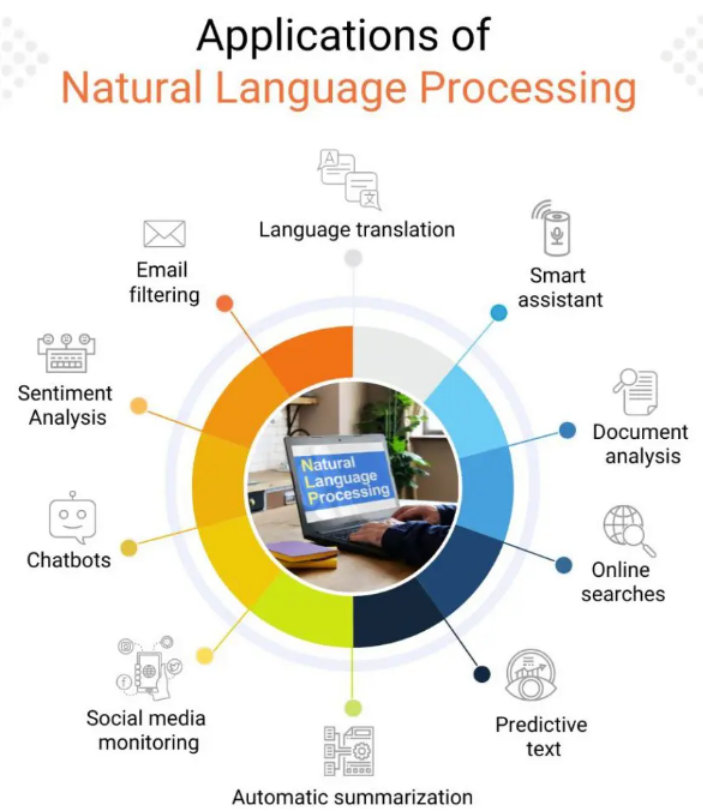

# Token(토큰)

우리는 각 문자가 무엇을 나타내는지 , 그리고 모든 문자가 어떻게 모여 문장의 단어를 형성하는지 이해합니다. 그러나 컴퓨터 자체로는 그러한 이해가 없으며 신경망은 훈련 중에 의미를 학습해야 합니다.     
  
따라서 텍스트를 표현할 때 다양한 접근 방식을 사용할 수 있습니다.   
   
- 문자(글자) 수준 표현(Character-level representation)
> 예) "토끼 안녕"은 "토", "끼", "안", "녕"으로 구분할 수 있다.      
- 단어 수준 표현(Word-level representation)
> 예) "토끼 안녕"은 "토끼", "안녕"으로 구분할 수 있다.

이러한 접근 방식을 통합하기 위해 일반적으로 텍스트의 원자 조각을 `토큰`이라고 합니다. 이렇게 텍스트를 일련의 `토큰`으로 변환하는 프로세스를 토큰화라고 합니다.     
다음으로 각 토큰을 신경망에 공급할 수 있는 숫자에 할당해야 합니다. 이를 `벡터화`라고 하며, 일반적으로 토큰 어휘를 구축하여 수행됩니다. 이런 `벡터화`의 과정을 `Word Embedding`이라고 한다.  

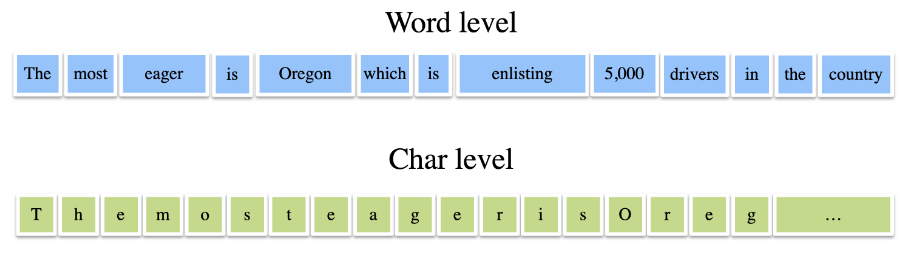

# Vocabulary(어휘집)
> 중복을 제거한 어휘와 index가 정의된 집합이다. 어휘집을 통해 문자를 숫자로 변환할 수 있다.

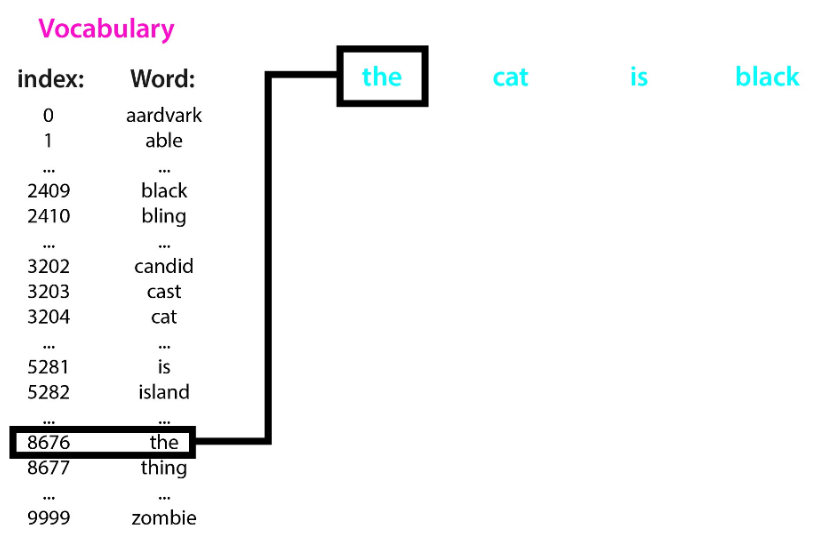

# Word Embedding
- 단어를 실수 형태의 벡터로 표현하는 것
- 신경망에서 임베딩 레이어를 추가하여 단어에 임베딩을 얻을 수 있음

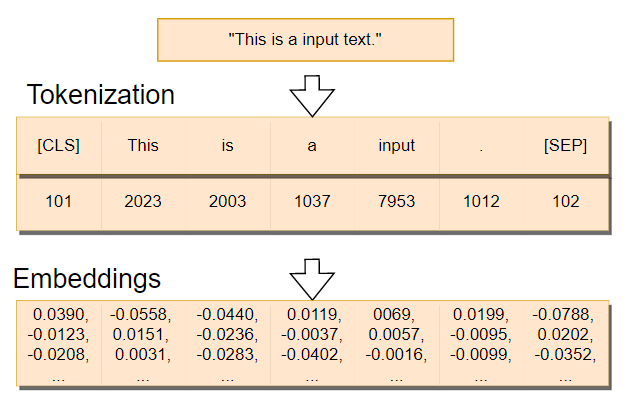

## Bag of Words - BOW
> Bag of Words는 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 방법이다.   

 BOW 인코딩 방법에서는 전체 문서{d1, d2, ..., dn}를 구성하는 고정된 단어장(vocabulary){t1, t2, ..., tn}를 만들고 di라는 개별 문서의 단어장에 해당 하는 단어들이 포함되어 있는지를 표시하는 방법이다.   
$$
x_{i,j} = 문서 d_i내의 단어 t_j의 출현 빈도
$$  
  또는     
$$
x_{i,j} = 
\begin{cases}
0, 만약 단어 t_j가 문서 d_i 안에 없으면, \\
1, 만약 단어 t_j가 문서 d_i 안에 있으면
\end{cases}
$$

In [ ]:
import pandas as pd 
import numpy as np 
from tqdm.auto import tqdm

import torch 
from torchtext.vocab import build_vocab_from_iterator

### DictVectorizer
> 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

vect = DictVectorizer(sparse=False)

In [ ]:
data = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = vect.fit_transform(data) # 인코딩 수치 벡터로 변환(X)

X는 아래와 같이 변환됨   
> {'A': 1, 'B': 2} -> [1, 2, 0]    
> {'B': 3, 'C': 1} -> [0, 3, 1]

In [ ]:
X 

array([[1., 2., 0.],
       [0., 3., 1.]])

In [ ]:
vect.feature_names_

['A', 'B', 'C']

In [ ]:
vect.transform({'A': 1, 'E': 3}) # E는 제외됨

array([[1., 0., 0.]])

In [ ]:
vect.transform({'C': 4, 'D': 3}) # D는 제외됨

array([[0., 0., 4.]])

### CountVectorizer
> 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

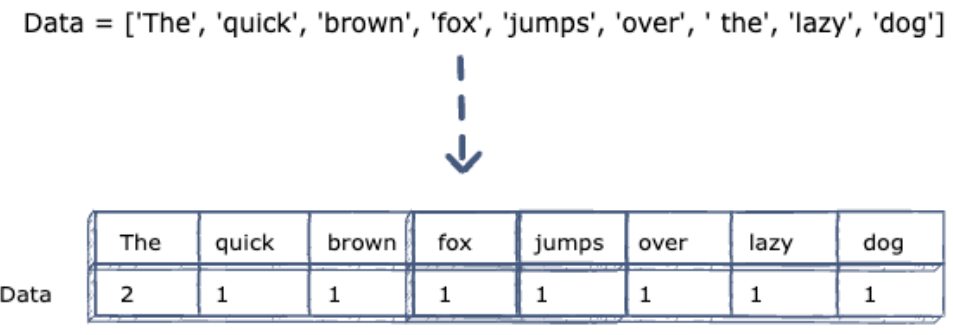

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [ ]:
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [ ]:
vect.transform(['This This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 2]])

In [ ]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

#### stop words
> stop words는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 관사, 접속사, 조사 등이 여기에 해당한다.

In [ ]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

#### token
> analyzer, tokenizer 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

In [ ]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [ ]:
import nltk
nltk.download('punkt')

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

#### N-gram
> N-gram은 단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [ ]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(corpus)
vect.vocabulary_

{'this': 21,
 'is': 5,
 'the': 14,
 'first': 3,
 'document': 2,
 'this is': 22,
 'is the': 6,
 'the first': 15,
 'first document': 4,
 'second': 11,
 'the second': 17,
 'second second': 13,
 'second document': 12,
 'and': 0,
 'third': 19,
 'one': 10,
 'and the': 1,
 'the third': 18,
 'third one': 20,
 'is this': 7,
 'this the': 23,
 'last': 8,
 'the last': 16,
 'last document': 9}

#### 빈도수
> `max_df, min_df`인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다.   
> 토큰의 빈도가 `max_df`로 지장한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다.

In [ ]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

### TfidfVectorizer
> `CountVectorizer`와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

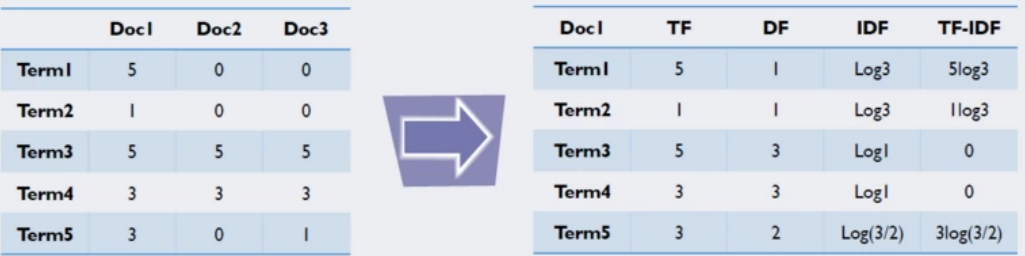

#### TF-IDF
> TF-IDF(Term Frequency - Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다.

구체적으로는 문서 d(document)와 단어 t에 대해 다음과 같이 계산한다.   
   
tf-idf(d,t) = tf(d,t) * idf(t)
   
여기에서
- tf(d,t): term frequency. 특정한 단어의 빈도수
- idf(t): inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수  
$$
idf(d,t) = log{ n \over 1 + df(t) }
$$
- n: 전체 문서의 수
- df(t): 단어 t를 가진 문서의 수

In [ ]:
corpus

['This is the first document.',
 'This is the second second document.',
 'And the third one.',
 'Is this the first document?',
 'The last document?']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [ ]:
pd.DataFrame(tfidv.transform(corpus).toarray(), columns = tfidv.get_feature_names_out())

,and,document,first,is,last,one,second,the,third,this
0,0.000000,0.389476,0.557751,0.462983,0.000000,0.000000,0.000000,0.329417,0.000000,0.462983
1,0.000000,0.241515,0.000000,0.287097,0.000000,0.000000,0.857376,0.204272,0.000000,0.287097
2,0.556669,0.000000,0.000000,0.000000,0.000000,0.556669,0.000000,0.265256,0.556669,0.000000
3,0.000000,0.389476,0.557751,0.462983,0.000000,0.000000,0.000000,0.329417,0.000000,0.462983
4,0.000000,0.453331,0.000000,0.000000,0.804659,0.000000,0.000000,0.383424,0.000000,0.000000


## WordCloud
> 단어구름 만들어 시각화하기

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white",width=500,height=500)

In [ ]:
vect = CountVectorizer()
tdm = vect.fit_transform(corpus)
tdm

<5x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [ ]:
df_tdm = pd.DataFrame(tdm.toarray(),columns=vect.get_feature_names_out())
df_tdm

,and,document,first,is,last,one,second,the,third,this
0,0,1,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,2,1,0,1
2,1,0,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,0,1,0,1
4,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_tdm.sum().to_dict()

{'and': 1,
 'document': 4,
 'first': 2,
 'is': 3,
 'last': 1,
 'one': 1,
 'second': 2,
 'the': 5,
 'third': 1,
 'this': 3}

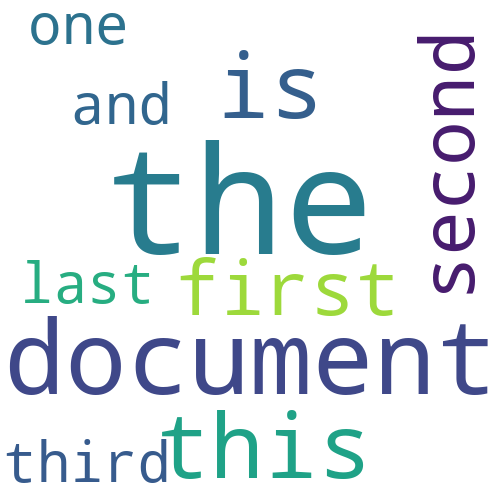

In [ ]:
cloud = wc.generate_from_frequencies(df_tdm.sum().to_dict())
cloud.to_image()

## Word2Vec

### 분산 가설(Distributed hypothesis)
`분산 가설(Distributed hypothesis)`은 같은 문맥의 단어, 즉 '비슷한 위치에 나오는 단어는 비슷한 의미를 가진다' 라는 의미이다.     
따라서 어떤 글의 비슷한 위치에 존해하는 단어는 단어 간의 유사도를 높게 측정할 것이다.  

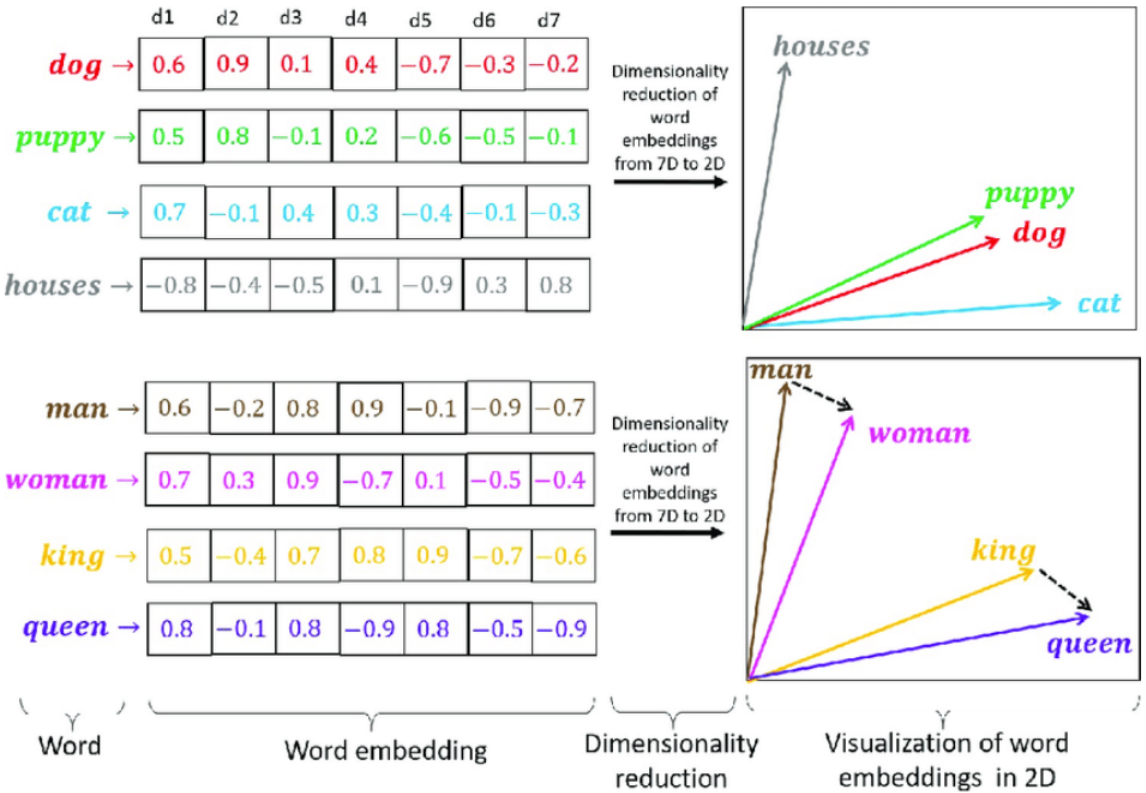

### Word2Vec 학습방법

- 단어의 빈도를 기준으로 단어의 벡터화(`Bag of Words`)를 하여 특징을 추출하는 방법은 단어 사이의 유사도를 나타내기 힘들다. 단어의 특징과 유사도를 나타내 주는 방법이 `Word2Vec`이다.    
- Word2Vec에는 `CBow`와 `Skip-gram`이 있다. `CBOW`는 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법이고, `Skip-gram`은 반대로 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 과정이다.

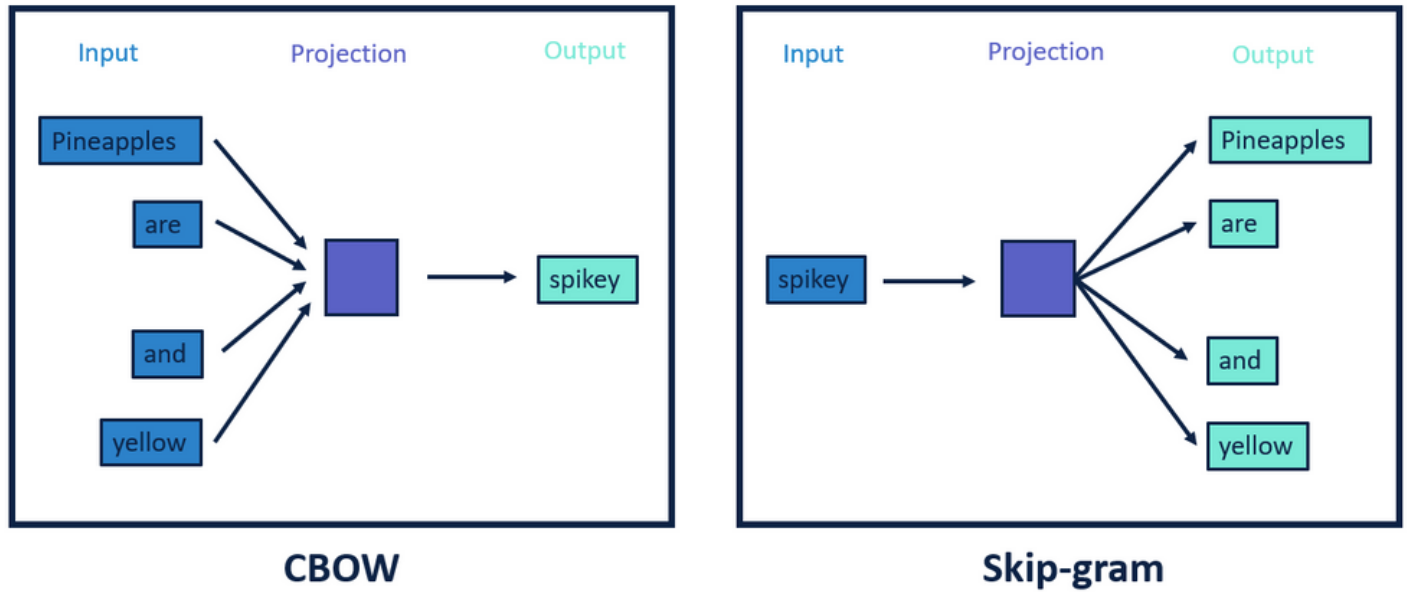

### Word2Vec 모델 학습

#### Load Data
- https://wikidocs.net/50739

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import numpy as np
import pandas as pd

DATA_PATH = "/content/data/MyDrive/lecture/6. deep learning/7-2. NLP_Pytorch/data/IMDB/"
df = pd.read_csv(DATA_PATH+"IMDB-Dataset.csv")

# df = df[:5000]
print(f'{df.shape}')
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Token

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from tqdm import tqdm

tokenized_data = []
for sentence in 
(df['review']):
    sentence = sentence.lower() # 대문자를 소문자로 변환
    sentence = sentence.replace('<br />', '') # 필요없는 문자 제거
    tokenized_sentence = nltk.word_tokenize(sentence) # 토큰화
    tokenized_data.append(tokenized_sentence)

100%|██████████| 50000/50000 [01:36<00:00, 519.71it/s]


In [ ]:
len(tokenized_data)

50000

리뷰의 최대 길이 : 2730
리뷰의 평균 길이 : 261.77498


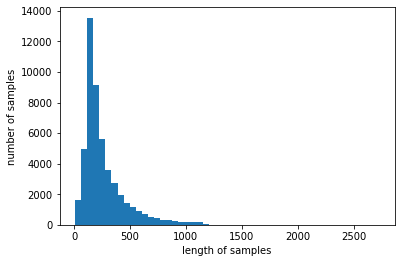

In [ ]:
import matplotlib.pyplot as plt

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### Train

- size: 임베딩 된 벡터의 차원
- window: 컨텍스트 원도우 크기
- min_count: 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.)
- workers: 학습을 위한 프로세스 수 
- sg: 0(CBOW), 1(Skip-gram)

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 300, window = 5, min_count = 5, workers = -1, sg = 0)

학습 모델을 이용한 유사 단어 확인
> 데이터가 많지 않아서 학습이 잘되지 않았음

In [ ]:
model_result = model.wv.most_similar("wonderful")
print(model_result)

[('pigeon', 0.2573654055595398), ("'63", 0.2179511934518814), ('pullman', 0.21580255031585693), ('peel', 0.21225938200950623), ('piercing', 0.2109139859676361), ('sounds', 0.20509065687656403), ('investor', 0.2046838104724884), ('snowed', 0.20399993658065796), ('stadiums', 0.20166218280792236), ('win', 0.20144307613372803)]


### Pre-trained Word2Vec
> 사전 학습된 모델

In [ ]:
import gensim
from gensim.test.utils import datapath
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
DATA_PATH = "/content/data/MyDrive/lecture/6. deep learning/7-2. NLP_Pytorch/models/"
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(DATA_PATH+'GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [ ]:
print(word2vec_model.similarity('man', 'woman'))

0.76640123


In [ ]:
model_result = word2vec_model.most_similar("wonderful")
print(model_result)

[('marvelous', 0.8188856840133667), ('fantastic', 0.8047919869422913), ('great', 0.7647868394851685), ('fabulous', 0.7614760994911194), ('terrific', 0.7420832514762878), ('lovely', 0.7320096492767334), ('amazing', 0.7263180017471313), ('beautiful', 0.6854087114334106), ('magnificent', 0.6633867025375366), ('delightful', 0.6574996113777161)]
